# Loading Dataset

In [0]:
import pandas as pd
data = pd.read_csv('https://raw.githubusercontent.com/pycaret/pycaret/master/datasets/kiva.csv')
data.head()

Out[103]:

,country,en,gender,loan_amount,nonpayment,sector,status
0,Dominican Republic,"""Banco Esperanza"" is a group of 10 women looki...",F,1225,partner,Retail,0
1,Dominican Republic,"""Caminemos Hacia Adelante"" or ""Walking Forward...",F,1975,lender,Clothing,0
2,Dominican Republic,"""Creciendo Por La Union"" is a group of 10 peop...",F,2175,partner,Clothing,0
3,Dominican Republic,"""Cristo Vive"" (""Christ lives"" is a group of 10...",F,1425,partner,Clothing,0
4,Dominican Republic,"""Cristo Vive"" is a large group of 35 people, 2...",F,4025,partner,Food,0


In [0]:
data.isnull().sum()

Out[104]: country 0
en 0
gender 0
loan_amount 0
nonpayment 0
sector 0
status 0
dtype: int64

# Text Preprocessing

In [0]:
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data] | 
[nltk_data] | Downloading package abc to /root/nltk_data...
[nltk_data] | Package abc is already up-to-date!
[nltk_data] | Downloading package alpino to /root/nltk_data...
[nltk_data] | Package alpino is already up-to-date!
[nltk_data] | Downloading package averaged_perceptron_tagger to
[nltk_data] | /root/nltk_data...
[nltk_data] | Package averaged_perceptron_tagger is already up-
[nltk_data] | to-date!
[nltk_data] | Downloading package averaged_perceptron_tagger_ru to
[nltk_data] | /root/nltk_data...
[nltk_data] | Package averaged_perceptron_tagger_ru is already
[nltk_data] | up-to-date!
[nltk_data] | Downloading package basque_grammars to
[nltk_data] | /root/nltk_data...
[nltk_data] | Package basque_grammars is already up-to-date!
[nltk_data] | Downloading package bcp47 to /root/nltk_data...
[nltk_data] | Package bcp47 is already up-to-date!
[nltk_data] | Downloading package biocreative_ppi to
[nltk_data] | /root/nltk_data...
[nltk_data] | Package biocreative_ppi is already up-to-date!
[nltk_data] | Downloading package bllip_wsj_no_aux to
[nltk_data] | /root/nltk_data...
[nltk_data] | Package bllip_wsj_no_aux is already up-to-date!
[nltk_data] | Downloading package book_grammars to
[nltk_data] | /root/nltk_data...
[nltk_data] | Package book_grammars is already up-to-date!
[nltk_data] | Downloading package brown to /root/nltk_data...
[nltk_data] | Package brown is already up-to-date!
[nltk_data] | Downloading package brown_tei to /root/nltk_data...
[nltk_data] | Package brown_tei is already up-to-date!
[nltk_data] | Downloading package cess_cat to /root/nltk_data...
[nltk_data] | Package cess_cat is already up-to-date!
[nltk_data] | Downloading package cess_esp to /root/nltk_data...
[nltk_data] | Package cess_esp is already up-to-date!
[nltk_data] | Downloading package chat80 to /root/nltk_data...
[nltk_data] | Package chat80 is already up-to-date!
[nltk_data] | Downloading package city_database to
[nltk_data] | /root/nltk_data...
[nltk_data] | Package city_database is already up-to-date!
[nltk_data] | Downloading package cmudict to /root/nltk_data...
[nltk_data] | Package cmudict is already up-to-date!
[nltk_data] | Downloading package comparative_sentences to
[nltk_data] | /root/nltk_data...
[nltk_data] | Package comparative_sentences is already up-to-
[nltk_data] | date!
[nltk_data] | Downloading package comtrans to /root/nltk_data...
[nltk_data] | Package comtrans is already up-to-date!
[nltk_data] | Downloading package conll2000 to /root/nltk_data...
[nltk_data] | Package conll2000 is already up-to-date!
[nltk_data] | Downloading package conll2002 to /root/nltk_data...
[nltk_data] | Package conll2002 is already up-to-date!
[nltk_data] | Downloading package conll2007 to /root/nltk_data...
[nltk_data] | Package conll2007 is already up-to-date!
[nltk_data] | Downloading package crubadan to /root/nltk_data...
[nltk_data] | Package crubadan is already up-to-date!
[nltk_data] | Downloading package dependency_treebank to
[nltk_data] | /root/nltk_data...
[nltk_data] | Package dependency_treebank is already up-to-date!
[nltk_data] | Downloading package dolch to /root/nltk_data...
[nltk_data] | Package dolch is already up-to-date!
[nltk_data] | Downloading package europarl_raw to
[nltk_data] | /root/nltk_data...
[nltk_data] | Package europarl_raw is already up-to-date!
[nltk_data] | Downloading package extended_omw to
[nltk_data] | /root/nltk_data...
[nltk_data] | Package extended_omw is already up-to-date!
[nltk_data] | Downloading package floresta to /root/nltk_data...
[nltk_data] | Package floresta is already up-to-date!
[nltk_data] | Downloading package framenet_v15 to
[nltk_data] | /root/nltk_data...
[nltk_data] | Package framenet_v15 is already up-to-date!
[nltk_data] | Downloading package framenet_v17 to
[nltk_data] | /root/nltk_data...
[nltk_data] | Package framenet_v17 is already up-to-date!
[nltk_data] | Downloading package gazetteers to /root/nltk_data...
[nltk_da

In [0]:
# create a list of text data from dataframe
text = list(data['en'])
type(text), len(text)

Out[106]: (list, 6818)

In [0]:
import re
from nltk.corpus import stopwords

from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

corpus = []

for i in range(len(text)):
    r = re.sub('[^a-zA-Z]', ' ', text[i])
    r = r.lower()
    r = r.split()
    r = [word for word in r if word not in stopwords.words('english')]
    r = [lemmatizer.lemmatize(word) for word in r]
    r = ' '.join(r)
    corpus.append(r)

In [0]:
for i in corpus[:10]:
    print(i)
    print('--------')

banco esperanza group woman looking receive small loan taken small loan already would second loan group going try expand small business start generating income p eduviges group representative leader group eduviges lot line child take care told child reason want successful want able provide different life show successful well p eduviges small business selling shoe avon product plan expand using loan dream success whole group ready new challenge road bettering life behalf eduviges group esperanza international thank support
--------
caminemos hacia adelante walking forward group ten entrepreneur seeking second loan esperanza international group past loan successfully repaid group hope use additional loan fund business expansion estella one coordinator group santiago estella sell undergarment community neighboring community estella used first loan completely repaid buy additional product estela able increase return business adding inventory estella want use second loan buy undergarment sell customer estella life mother sister dream improving house live plan use business profit member estellas microfinance bank run similar entrepreneurial activity including art juice ice cream fried food cake sale behalf esperanza group business entrepreneur would like thank support
--------
creciendo por la union group people hoping start business group looking receive loan either start small business try increase business everyone group living extreme poverty see chance improve life life family dalina group representative chosen hardworking woman young mother two child realized wanted better life family hoping start small business selling clothes people barrio hope someday thriving business able provide family behalf dalina rest group esperanza international thank support
--------
cristo vive christ life group woman looking receive first loan young group woman want start changing life right away riquena group representative leader group year old also married child told kid want able provide good life main reason trying start business plan selling used clothes area hope one day big clothing store also design clothes motivated person see speak speaks spanish creole fluently studying english whole group ready next step excited opportunity behalf riquena group esperanza international thank support
--------
cristo vive large group people hoping take loan many second loan loan hope use increase business business range clothing sale salon miline chosen group representative due hard work dedication miline hardworking mother young child oldest year old took first loan started small business selling chicken type food next loan feel like increase business greatly start making money support family dream store someday able provide family comfortable life behalf miline group esperanza international thank support
--------
dios con nosotros large group esperanza borrower group ten member hoping receive loan group successful receiving sixth loan p lorenza group representative chosen leader good reason lorenza hard worker responsible person mother two young child everything child mind owns small store hope keep increasing business great success story went income owning small store really feel like future bright excited provide child new loan going increase size business help lot p whole group excited new loan opportunity receiving p behalf lorenza group esperanza international thank help
--------
dios nuestro ayudador group haitian woman point life living extreme poverty dominican republic none steady income living day day meal meal p macula group representative leader chosen diligent excited opportunity see eye ready better life mother child anything want better life plan starting small beauty salon house dream thriving business want provide kid comfortable life p whole group ready take first step bettering life behalf macula group esperanza international thank support
--------
el amor large group borrower loan member group hoping receive third loan first two lo

# Vectorization

In [0]:
# Vectorizer
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(stop_words = 'english', min_df=0.01)
doc = cv.fit_transform(corpus)

In [0]:
# see the type of doc
doc

Out[110]: <6818x1111 sparse matrix of type '<class 'numpy.int64'>'
	with 361100 stored elements in Compressed Sparse Row format>

In [0]:
# if you want to see it as a dataframe 
import pandas as pd
df = pd.DataFrame(doc.toarray(), columns = cv.get_feature_names())
df.head()

Out[111]:

,ability,able,absence,accept,access,accessory,accountable,accounting,achieve,ack,acquire,acquired,acre,action,active,activity,add,adding,addition,additional,adult,advance,advantage,affected,affecting,afford,afternoon,age,aged,ago,agricola,agriculture,ahead,aid,air,allow,allowed,allows,altagracia,ana,...,venture,village,visit,volume,volunteer,wanjiru,want,wanted,water,watering,watermelon,way,weec,weed,week,weekend,went,wholesale,wide,widow,wife,willing,winter,wisely,wish,woman,wood,work,worked,worker,working,workshop,worth,www,year,yield,young,younger,youngest,youth
0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,1,0,1,0,0,0
4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0


# Latent Dirichlet Allocation

In [0]:
# Topic model with 10 topics
from sklearn.decomposition import LatentDirichletAllocation
LDA = LatentDirichletAllocation(n_components=5, max_iter = 100, random_state=123)

In [0]:
# This can long time
LDA.fit(doc)

Out[113]: LatentDirichletAllocation(max_iter=100, n_components=5, random_state=123)

In [0]:
LDA.components_.shape

Out[114]: (5, 1111)

In [0]:
pd.DataFrame(LDA.components_, columns = cv.get_feature_names())

Out[115]:

,ability,able,absence,accept,access,accessory,accountable,accounting,achieve,ack,acquire,acquired,acre,action,active,activity,add,adding,addition,additional,adult,advance,advantage,affected,affecting,afford,afternoon,age,aged,ago,agricola,agriculture,ahead,aid,air,allow,allowed,allows,altagracia,ana,...,venture,village,visit,volume,volunteer,wanjiru,want,wanted,water,watering,watermelon,way,weec,weed,week,weekend,went,wholesale,wide,widow,wife,willing,winter,wisely,wish,woman,wood,work,worked,worker,working,workshop,worth,www,year,yield,young,younger,youngest,youth
0,42.349295,1656.996182,0.200302,0.209824,46.955317,83.033139,0.200186,0.201768,47.917058,0.200305,54.837389,33.968317,0.204726,28.416638,0.203249,15.068759,172.088993,55.758161,71.915579,449.170764,14.274502,49.753618,67.656163,34.369640,0.209484,102.295515,0.204037,135.476324,249.449607,187.491790,0.200001,0.206809,0.203710,151.194160,112.188273,43.808572,14.311023,0.203097,0.200217,0.200197,...,77.892285,68.343161,0.202828,0.205280,0.200828,38.527377,359.072082,23.321081,0.204604,0.200004,6.670418,102.092199,0.201152,0.200003,170.737700,0.203658,57.627466,130.059460,68.951752,132.720111,406.906847,0.205753,0.200116,0.201026,108.116483,210.342324,5.876482,510.135153,98.137263,84.237371,245.025529,53.582421,182.477848,0.200421,2526.467777,0.203028,322.400927,88.009784,32.741054,66.923773
1,0.204684,428.769131,0.200030,212.187761,23.921936,0.201352,0.201704,1.304932,16.707130,154.199543,8.647135,28.371507,111.192007,15.571624,600.502450,198.120622,85.449201,14.109639,39.162579,17.551840,17.297366,5.324668,13.445336,13.489745,206.190026,6.330758,0.202322,57.713865,21.850982,275.046895,0.200000,6.684127,2.720249,0.203152,0.203720,0.203484,9.377241,54.891996,0.200098,0.200245,...,16.855494,92.402279,0.204052,0.201384,0.200443,37.872173,205.003724,5.909482,304.952863,0.203401,3.516318,49.739046,433.198504,0.200000,0.206233,0.201439,30.586500,12.234855,0.203071,53.774350,0.202477,543.190474,0.200058,0.202158,14.314083,1125.004053,0.201664,225.365684,24.107446,3.662652,87.221258,0.201913,2.307409,0.200186,1270.003581,15.316201,104.958745,3.317126,6.875260,26.954561
2,21.786470,319.218630,0.200005,0.201979,70.697285,54.647307,72.196066,0.202775,66.335997,0.200093,22.414447,6.008772,0.200688,0.200480,51.892382,203.056794,247.141077,21.842293,28.665397,52.394673,5.763698,27.271129,15.103887,0.201815,0.200336,37.941458,30.093311,345.968802,90.038298,370.664889,0.200003,0.202841,20.473251,0.201542,0.203011,279.030010,20.606736,20.591687,164.198647,216.748162,...,14.218618,0.208326,208.106125,198.797349,0.200398,0.200221,506.347847,24.218438,0.203840,0.200968,0.202931,214.341330,0.200211,0.200004,50.774561,40.285873,0.202692,41.594653,50.432959,0.204520,0.201272,0.201516,0.200069,100.192627,7.841240,1633.248917,0.203226,399.350840,4.716568,14.428627,380.799745,0.203069,5.808587,0.200619,1658.667985,0.200257,276.001026,0.202534,58.856519,2.052630
3,20.458044,1431.752472,0.200022,0.200404,18.671221,87.917565,0.201960,0.201650,25.839190,0.200029,17.026068,19.451200,0.201210,97.610078,0.201646,62.522243,20.194464,12.037933,66.628716,97.819177,54.356080,0.213045,78.592936,0.207128,0.200117,41.068789,68.299578,123.199075,0.204475,562.015999,0.200006,0.203298,78.397791,0.201036,0.204111,126.720022,106.338280,55.096669,0.200979,76.650756,...,44.581259,21.845805,262.160971,14.999536,921.197841,0.200068,645.553129,22.350649,34.007953,0.200015,0.207194,172.497934,0.200094,0.200021,285.987970,81.104293,45.382353,225.909951,0.210084,13.093784,526.328729,0.201939,16.638922,0.203904,158.527824,0.203809,187.550203,1613.217361,194.401286,109.600999,479.238338,139.811974,0.204472,0.214602,2803.198442,0.201395,144.182306,20.373719,28.350323,2.868834
4,0.201507,39.263585,147.199642,0.200032,752.754241,0.200637,0.200083,74.088875,0.200624,0.200030,2.074960,0.200204,0.201368,0.201180,0.200273,225.231581,47.126265,1.251974,22.627729,4.063545,2.308354,42.437539,0.201678,117.731672,0.200036,7.363480,0.

In [0]:
# see the most common words by topic
for index,topic in enumerate(LDA.components_):
    print(f'THE TOP 30 WORDS FOR TOPIC #{index}')
    print([cv.get_feature_names()[i] for i in topic.argsort()[:10]])
    print('\n')

THE TOP 30 WORDS FOR TOPIC #0
['dole', 'resorting', 'ruined', 'agricola', 'colombia', 'cooperatively', 'removing', 'sowed', 'boleo', 'paddy']


THE TOP 30 WORDS FOR TOPIC #1
['ruined', 'resorting', 'dole', 'agricola', 'cooperatively', 'paddy', 'dispersed', 'boleo', 'weed', 'cacao']


THE TOP 30 WORDS FOR TOPIC #2
['exceed', 'agricola', 'plowing', 'sowed', 'boleo', 'paddy', 'weed', 'dispersed', 'cooperatively', 'decade']


THE TOP 30 WORDS FOR TOPIC #3
['agricola', 'lowland', 'religious', 'watering', 'commercialize', 'imperative', 'plowing', 'boleo', 'paddy', 'weed']


THE TOP 30 WORDS FOR TOPIC #4
['bale', 'fsma', 'kiambu', 'choir', 'ack', 'accept', 'disclaimer', 'unsettled', 'committee', 'cafeteria']

In [0]:
# applying the model to dataset
topic_results = LDA.transform(doc)
data_topics = pd.DataFrame(topic_results)
data_topics.head()

Out[117]:

,0,1,2,3,4
0,0.003248,0.003239,0.758109,0.232187,0.003217
1,0.002639,0.002607,0.663900,0.328267,0.002588
2,0.003586,0.003609,0.628053,0.361208,0.003544
3,0.003464,0.003480,0.644543,0.345073,0.003440
4,0.003259,0.003239,0.560809,0.429490,0.003203


In [0]:
data_topics.shape

Out[118]: (6818, 5)

In [0]:
data['Topic'] = topic_results.argmax(axis=1)
data.head()

Out[119]:

,country,en,gender,loan_amount,nonpayment,sector,status,Topic
0,Dominican Republic,"""Banco Esperanza"" is a group of 10 women looki...",F,1225,partner,Retail,0,2
1,Dominican Republic,"""Caminemos Hacia Adelante"" or ""Walking Forward...",F,1975,lender,Clothing,0,2
2,Dominican Republic,"""Creciendo Por La Union"" is a group of 10 peop...",F,2175,partner,Clothing,0,2
3,Dominican Republic,"""Cristo Vive"" (""Christ lives"" is a group of 10...",F,1425,partner,Clothing,0,2
4,Dominican Republic,"""Cristo Vive"" is a large group of 35 people, 2...",F,4025,partner,Food,0,2


Out[120]:

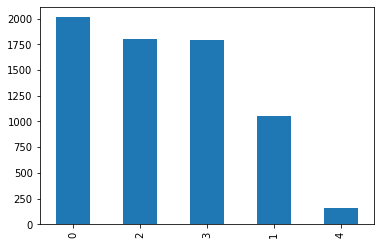

<AxesSubplot:>

In [0]:
data['Topic'].value_counts().plot.bar()